In [1]:
import requests
from bs4 import BeautifulSoup
import lxml
import pandas as pd

print ('all libraries were installed')

all libraries were installed


In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_companies_of_Nigeria'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')
Table1 = soup.find_all('table', class_="wikitable sortable")
Table1

[<table class="wikitable sortable">
 <caption>Notable companies <br/>
 <span style="font-size:smaller;">Status: P=Private, S=State; A=Active, D=Defunct</span>
 </caption>
 <tbody><tr>
 <th rowspan="2">Name
 </th>
 <th rowspan="2">Industry
 </th>
 <th rowspan="2">Sector
 </th>
 <th rowspan="2">Headquarters
 </th>
 <th rowspan="2">Founded
 </th>
 <th class="unsortable" rowspan="2">Notes
 </th>
 <th colspan="2">Status
 </th></tr>
 <tr>
 <th style="text-align:center"> 
 </th>
 <th style="text-align:center"> 
 </th></tr>
 <tr style="background:#ffffff;">
 <td><a href="/wiki/Access_Bank_plc" title="Access Bank plc">Access Bank</a>
 </td>
 <td>Financials
 </td>
 <td>Banks
 </td>
 <td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
 </td>
 <td>1989
 </td>
 <td>Commercial bank
 </td>
 <td style="text-align:center;">P
 </td>
 <td style="text-align:center;">A
 </td></tr>
 <tr style="background:#efefef;">
 <td><a href="/wiki/Aero_Contractors_(Nigeria)" title="Aero Contractors (Nigeria)">Aero Contrac

In [3]:
ths = soup.find_all('th') #the '==$0' in the table structure would not allow me directly get 'th' in the table
header_texts = [th.text.strip() for th in ths] #so I first extract all the 'th' tags in the page
print(header_texts)

['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes', 'Status', '', '', 'vteList of companies of Africa', 'Sovereign states', 'States with limitedrecognition', 'Dependencies andother territories']


In [4]:
first_seven_ths = ths[:7] #from the output above, the first seven (from Name to Status) are the text that I want
table_head = [th.text.strip() for th in first_seven_ths]
print(table_head)

['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes', 'Status']


In [ ]:
tbody_html_content = '''<tbody>

<tr style="background:#ffffff;">
<td><a href="/wiki/Access_Bank_plc" title="Access Bank plc">Access Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1989
</td>
<td>Commercial bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><a href="/wiki/Aero_Contractors_(Nigeria)" title="Aero Contractors (Nigeria)">Aero Contractors</a>
</td>
<td>Consumer services
</td>
<td>Airlines
</td>
<td><a href="/wiki/Ikeja" title="Ikeja">Ikeja</a>
</td>
<td>1959
</td>
<td>State charter airline
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Arik_Air" title="Arik Air">Arik Air</a>
</td>
<td>Consumer services
</td>
<td>Airlines
</td>
<td><a href="/wiki/Ikeja" title="Ikeja">Ikeja</a>
</td>
<td>2002
</td>
<td>Airline
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/BUA_Cement" title="BUA Cement">BUA Cement</a>
</td>
<td>Industrials
</td>
<td>Building materials &amp; fixtures
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2008
</td>
<td>Cement, part of BUA Group
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/BUA_Foods" title="BUA Foods">BUA Foods</a>
</td>
<td>Consumer goods
</td>
<td>Food
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1988
</td>
<td>Food industry, part of BUA Group
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Cassava_Republic_Press" title="Cassava Republic Press">Cassava Republic Press</a>
</td>
<td>Consumer services
</td>
<td>Publishing
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>2006
</td>
<td>Publisher
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><a href="/wiki/Central_Bank_of_Nigeria" title="Central Bank of Nigeria">Central Bank of Nigeria</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>1958
</td>
<td>State-owned bank
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Chanchangi_Airlines" title="Chanchangi Airlines">Chanchangi Airlines</a>
</td>
<td>Consumer services
</td>
<td>Airlines
</td>
<td><a href="/wiki/Kaduna" title="Kaduna">Kaduna</a>
</td>
<td>1994
</td>
<td>Airline
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A|-style="background:#ffffff;"
</td>
<td><a href="/wiki/C%26I_Leasing_Group_PLC" title="C&amp;I Leasing Group PLC">C&amp;I Leasing Group PLC</a>
</td>
<td>Industrials
</td>
<td>Marine transportation
</td>
<td><a href="/wiki/Lekki" title="Lekki">Lekki</a>
</td>
<td>1990
</td>
<td>Leasing
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Chocolate_City_(music_label)" class="mw-redirect" title="Chocolate City (music label)">Chocolate City Records</a>
</td>
<td>Consumer services
</td>
<td>Broadcasting &amp; entertainment
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2005
</td>
<td>Music label founded by <a href="/wiki/Audu_Maikori" title="Audu Maikori">Audu Maikori</a>
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Dana_Air" title="Dana Air">Dana Air</a>
</td>
<td>Consumer services
</td>
<td>Airlines
</td>
<td><a href="/wiki/Ikeja" title="Ikeja">Ikeja</a>
</td>
<td>2008
</td>
<td>Regional airline
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Dangote_Cement" title="Dangote Cement">Dangote Cement</a>
</td>
<td>Industrials
</td>
<td>Building materials &amp; fixtures
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1992
</td>
<td>Cement, part of <a href="/wiki/Dangote_Group" title="Dangote Group">Dangote Group</a>
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Dangote_Group" title="Dangote Group">Dangote Group</a>
</td>
<td>Conglomerates
</td>
<td>–
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1981
</td>
<td>Cement, food and beverage, oil and gas
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Diamond_Bank" title="Diamond Bank">Diamond Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1990
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Ensure_insurance_(Nigeria)" class="mw-redirect" title="Ensure insurance (Nigeria)">Ensure</a>
</td>
<td>Financials
</td>
<td>Full line insurance
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1993
</td>
<td>Insurance
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/First_City_Monument_Bank" title="First City Monument Bank">First City Monument Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1982
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Fidelity_Bank_Nigeria" title="Fidelity Bank Nigeria">Fidelity Bank Nigeria</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1988
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/First_Bank_of_Nigeria" title="First Bank of Nigeria">First Bank of Nigeria</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1894
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Guaranty_Trust_Bank" class="mw-redirect" title="Guaranty Trust Bank">Guaranty Trust Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1990
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Industrial_and_General_Insurance_Company" title="Industrial and General Insurance Company">Industrial and General Insurance Company</a>
</td>
<td>Financials
</td>
<td>Full line insurance
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1991
</td>
<td>Insurance
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Jiji.ng" class="mw-redirect" title="Jiji.ng">Jiji.ng</a>
</td>
<td>Technology
</td>
<td>Internet
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2014
</td>
<td>Online marketplace
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/John_Holt_plc" title="John Holt plc">John Holt plc</a>
</td>
<td>Industrials
</td>
<td>Diversified industrials
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1897
</td>
<td>Industrials, power, logistics
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Julius_Berger_(company)" title="Julius Berger (company)">Julius Berger</a>
</td>
<td>Industrials
</td>
<td>Heavy construction
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>1950
</td>
<td>Construction and development
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Jumia" title="Jumia">Jumia</a>
</td>
<td>Technology
</td>
<td>Internet
</td>
<td><a href="/wiki/Ikeja" title="Ikeja">Ikeja</a>
</td>
<td>2012
</td>
<td>E-commerce platform
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Kabo_Air" title="Kabo Air">Kabo Air</a>
</td>
<td>Consumer services
</td>
<td>Airlines
</td>
<td><a href="/wiki/Kano_(city)" title="Kano (city)">Kano</a>
</td>
<td>1980
</td>
<td>Airline
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Kakawa_Discount_House_Limited" class="mw-redirect" title="Kakawa Discount House Limited">Kakawa Discount House Limited</a>
</td>
<td>Financials
</td>
<td>Investment services
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1995
</td>
<td>Discount house
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Keystone_Bank_Limited" title="Keystone Bank Limited">Keystone Bank Limited</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2011
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Leadway" title="Leadway">Leadway</a>
</td>
<td>Financials
</td>
<td>Full line insurance
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1970
</td>
<td>Insurance
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Mavin_Records" title="Mavin Records">Mavin Records</a>
</td>
<td>Consumer services
</td>
<td>Broadcasting &amp; entertainment
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2012
</td>
<td>Music label founded by <a href="/wiki/Don_Jazzy" title="Don Jazzy">Don Jazzy</a>
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Mikano_International_Limited" title="Mikano International Limited">Mikano International Limited</a>
</td>
<td>Industrials
</td>
<td>Diversified industrials
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1993
</td>
<td>Electrical power generation, real estate and construction
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><a href="/wiki/Nigerian_National_Petroleum_Corporation" class="mw-redirect" title="Nigerian National Petroleum Corporation">Nigerian National Petroleum Corporation</a> (NNPC)
</td>
<td>Oil &amp; gas
</td>
<td>Exploration &amp; production
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>1977
</td>
<td>State-owned oil
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><a href="/wiki/Nigerian_Postal_Service" title="Nigerian Postal Service">Nigerian Postal Service</a>
</td>
<td>Industrials
</td>
<td>Delivery services
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>1987
</td>
<td>Postal services
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><a href="/wiki/Nigerian_Railway_Corporation" title="Nigerian Railway Corporation">Nigerian Railway Corporation</a>
</td>
<td>Industrials
</td>
<td>Railroads
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1898
</td>
<td>National railways
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><a href="/wiki/Nigerian_Television_Authority" title="Nigerian Television Authority">Nigerian Television Authority</a>
</td>
<td>Consumer services
</td>
<td>Broadcasting &amp; entertainment
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>1977
</td>
<td>State-owned television
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Oando" title="Oando">Oando</a>
</td>
<td>Oil &amp; gas
</td>
<td>Exploration &amp; production
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1956
</td>
<td>Petrochemical and energy
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/ROCAD_Construction_Limited" title="ROCAD Construction Limited">ROCAD Construction Limited</a>
</td>
<td>Industrials
</td>
<td>Heavy construction
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>2002
</td>
<td>Construction
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Shell_Nigeria" title="Shell Nigeria">Shell Nigeria</a>
</td>
<td>Oil &amp; gas
</td>
<td>Exploration &amp; production
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>1937
</td>
<td>Part of <a href="/wiki/Royal_Dutch_Shell" class="mw-redirect" title="Royal Dutch Shell">Royal Dutch Shell</a> (Netherlands)
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Skye_Bank" class="mw-redirect" title="Skye Bank">Skye Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2006
</td>
<td>Has now been changed to Polaris Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#e4e4e4;">
<td><a href="/wiki/Spring_Bank" title="Spring Bank">Spring Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2004
</td>
<td>Bank, defunct 2011
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">D
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Sterling_Bank_(Nigeria)" title="Sterling Bank (Nigeria)">Sterling Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1960
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><i><a href="/wiki/The_Tide_(Nigeria)" title="The Tide (Nigeria)">The Tide</a></i>
</td>
<td>Consumer services
</td>
<td>Publishing
</td>
<td><a href="/wiki/Port_Harcourt" title="Port Harcourt">Port Harcourt</a>
</td>
<td>1971
</td>
<td>State-owned newspaper
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#efefef;">
<td><a href="/wiki/Transmission_Company_of_Nigeria" title="Transmission Company of Nigeria">Transmission Company of Nigeria</a>
</td>
<td>Utilities
</td>
<td>Electricity transmission
</td>
<td><a href="/wiki/Abuja" title="Abuja">Abuja</a>
</td>
<td>2005
</td>
<td>Power
</td>
<td style="text-align:center;">S
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Transnational_Corporation_of_Nigeria" title="Transnational Corporation of Nigeria">Transnational Corporation of Nigeria</a>
</td>
<td>Conglomerates
</td>
<td>–
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2004
</td>
<td>Food and beverage, power, hotels
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Union_Bank_of_Nigeria" title="Union Bank of Nigeria">Union Bank of Nigeria</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1917
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/United_Africa_Company_of_Nigeria" title="United Africa Company of Nigeria">United Africa Company of Nigeria</a>
</td>
<td>Conglomerates
</td>
<td>–
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1931
</td>
<td>Logistics, real estate, industrials
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/United_Bank_for_Africa" title="United Bank for Africa">United Bank for Africa</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1949
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Wema_Bank" title="Wema Bank">Wema Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1945
</td>
<td>Bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Wemy_industries" title="Wemy industries">Wemy industries</a>
</td>
<td>Consumer
</td>
<td>Personal goods
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1978
</td>
<td>Personal hygiene products
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Zenith_Bank" title="Zenith Bank">Zenith Bank</a>
</td>
<td>Financials
</td>
<td>Banks
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>1990
</td>
<td>Commercial bank
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr>
<tr style="background:#ffffff;">
<td><a href="/wiki/Dotts_Media_House" title="Dotts Media House">Dotts Media House</a>
</td>
<td>Media
</td>
<td>PR &amp; Digital Marketing
</td>
<td><a href="/wiki/Lagos" title="Lagos">Lagos</a>
</td>
<td>2014
</td>
<td>Influencer Marketing, Content Marketing, Brand Activations
</td>
<td style="text-align:center;">P
</td>
<td style="text-align:center;">A
</td></tr></tbody>'''

In [6]:
soup2 = BeautifulSoup(tbody_html_content, 'lxml') #parsing the html-content with lxml

In [7]:
headers = ['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes', 'Private/State', 'Active/Defunct'] #edited the extracted headers
table_data = []
for row in soup2.find('tbody').find_all('tr'): 
    cells = [td.text.strip() for td in row.find_all('td')]
    print (cells)

['Access Bank', 'Financials', 'Banks', 'Lagos', '1989', 'Commercial bank', 'P', 'A']
['Aero Contractors', 'Consumer services', 'Airlines', 'Ikeja', '1959', 'State charter airline', 'S', 'A']
['Arik Air', 'Consumer services', 'Airlines', 'Ikeja', '2002', 'Airline', 'P', 'A']
['BUA Cement', 'Industrials', 'Building materials & fixtures', 'Lagos', '2008', 'Cement, part of BUA Group', 'P', 'A']
['BUA Foods', 'Consumer goods', 'Food', 'Lagos', '1988', 'Food industry, part of BUA Group', 'P', 'A']
['Cassava Republic Press', 'Consumer services', 'Publishing', 'Abuja', '2006', 'Publisher', 'P', 'A']
['Central Bank of Nigeria', 'Financials', 'Banks', 'Abuja', '1958', 'State-owned bank', 'S', 'A']
['Chanchangi Airlines', 'Consumer services', 'Airlines', 'Kaduna', '1994', 'Airline', 'P', 'A|-style="background:#ffffff;"', 'C&I Leasing Group PLC', 'Industrials', 'Marine transportation', 'Lekki', '1990', 'Leasing', 'P', 'A']
['Chocolate City Records', 'Consumer services', 'Broadcasting & entertainme

In [8]:
celldata = [
    ['Access Bank', 'Financials', 'Banks', 'Lagos', '1989', 'Commercial bank', 'P', 'A'],
    ['Aero Contractors', 'Consumer services', 'Airlines', 'Ikeja', '1959', 'State charter airline', 'S', 'A'],
    ['Arik Air', 'Consumer services', 'Airlines', 'Ikeja', '2002', 'Airline', 'P', 'A'],
    ['BUA Cement', 'Industrials', 'Building materials & fixtures', 'Lagos', '2008', 'Cement, part of BUA Group', 'P', 'A'],
    ['BUA Foods', 'Consumer goods', 'Food', 'Lagos', '1988', 'Food industry, part of BUA Group', 'P', 'A'],
    ['Cassava Republic Press', 'Consumer services', 'Publishing', 'Abuja', '2006', 'Publisher', 'P', 'A'],
    ['Central Bank of Nigeria', 'Financials', 'Banks', 'Abuja', '1958', 'State-owned bank', 'S', 'A'],
    ['Chanchangi Airlines', 'Consumer services', 'Airlines', 'Kaduna', '1994', 'Airline', 'P', 'A'],
    ['C&I Leasing Group PLC', 'Industrials', 'Marine transportation', 'Lekki', '1990', 'Leasing', 'P', 'A'],
    ['Chocolate City Records', 'Consumer services', 'Broadcasting & entertainment', 'Lagos', '2005', 'Music label founded by Audu Maikori', 'P', 'A'],
    ['Dana Air', 'Consumer services', 'Airlines', 'Ikeja', '2008', 'Regional airline', 'P', 'A'],
    ['Dangote Cement', 'Industrials', 'Building materials & fixtures', 'Lagos', '1992', 'Cement, part of Dangote Group', 'P', 'A'],
    ['Dangote Group', 'Conglomerates', '–', 'Lagos', '1981', 'Cement, food and beverage, oil and gas', 'P', 'A'],
    ['Diamond Bank', 'Financials', 'Banks', 'Lagos', '1990', 'Bank', 'P', 'A'],
    ['Ensure', 'Financials', 'Full line insurance', 'Lagos', '1993', 'Insurance', 'P', 'A'],
    ['First City Monument Bank', 'Financials', 'Banks', 'Lagos', '1982', 'Bank', 'P', 'A'],
    ['Fidelity Bank Nigeria', 'Financials', 'Banks', 'Lagos', '1988', 'Bank', 'P', 'A'],
    ['First Bank of Nigeria', 'Financials', 'Banks', 'Lagos', '1894', 'Bank', 'P', 'A'],
    ['Guaranty Trust Bank', 'Financials', 'Banks', 'Lagos', '1990', 'Bank', 'P', 'A'],
    ['Industrial and General Insurance Company', 'Financials', 'Full line insurance', 'Lagos', '1991', 'Insurance', 'P', 'A'],
    ['Jiji.ng', 'Technology', 'Internet', 'Lagos', '2014', 'Online marketplace', 'P', 'A'],
    ['John Holt plc', 'Industrials', 'Diversified industrials', 'Lagos', '1897', 'Industrials, power, logistics', 'P', 'A'],
    ['Julius Berger', 'Industrials', 'Heavy construction', 'Abuja', '1950', 'Construction and development', 'P', 'A'],
    ['Jumia', 'Technology', 'Internet', 'Ikeja', '2012', 'E-commerce platform', 'P', 'A'],
    ['Kabo Air', 'Consumer services', 'Airlines', 'Kano', '1980', 'Airline', 'P', 'A'],
    ['Kakawa Discount House Limited', 'Financials', 'Investment services', 'Lagos', '1995', 'Discount house', 'P', 'A'],
    ['Keystone Bank Limited', 'Financials', 'Banks', 'Lagos', '2011', 'Bank', 'P', 'A'],
    ['Leadway', 'Financials', 'Full line insurance', 'Lagos', '1970', 'Insurance', 'P', 'A'],
    ['Mavin Records', 'Consumer services', 'Broadcasting & entertainment', 'Lagos', '2012', 'Music label founded by Don Jazzy', 'P', 'A'],
    ['Mikano International Limited', 'Industrials', 'Diversified industrials', 'Lagos', '1993', 'Electrical power generation, real estate and construction', 'P', 'A'],
    ['Nigerian National Petroleum Corporation (NNPC)', 'Oil & gas', 'Exploration & production', 'Abuja', '1977', 'State-owned oil', 'S', 'A'],
    ['Nigerian Postal Service', 'Industrials', 'Delivery services', 'Abuja', '1987', 'Postal services', 'S', 'A'],
    ['Nigerian Railway Corporation', 'Industrials', 'Railroads', 'Lagos', '1898', 'National railways', 'S', 'A'],
    ['Nigerian Television Authority', 'Consumer services', 'Broadcasting & entertainment', 'Abuja', '1977', 'State-owned television', 'S', 'A'],
    ['Oando', 'Oil & gas', 'Exploration & production', 'Lagos', '1956', 'Petrochemical and energy', 'P', 'A'],
    ['ROCAD Construction Limited', 'Industrials', 'Heavy construction', 'Abuja', '2002', 'Construction', 'P', 'A'],
    ['Shell Nigeria', 'Oil & gas', 'Exploration & production', 'Abuja', '1937', 'Part of Royal Dutch Shell (Netherlands)', 'P', 'A'],
    ['Skye Bank', 'Financials', 'Banks', 'Lagos', '2006', 'Has now been changed to Polaris Bank', 'P', 'A'],
    ['Spring Bank', 'Financials', 'Banks', 'Lagos', '2004', 'Bank, defunct 2011', 'P', 'D'],
    ['Sterling Bank', 'Financials', 'Banks', 'Lagos', '1960', 'Bank', 'P', 'A'],
    ['The Tide', 'Consumer services', 'Publishing', 'Port Harcourt', '1971', 'State-owned newspaper', 'S', 'A'],
    ['Transmission Company of Nigeria', 'Utilities', 'Electricity transmission', 'Abuja', '2005', 'Power', 'S', 'A'],
    ['Transnational Corporation of Nigeria', 'Conglomerates', '–', 'Lagos', '2004', 'Food and beverage, power, hotels', 'P', 'A'],
    ['Union Bank of Nigeria', 'Financials', 'Banks', 'Lagos', '1917', 'Bank', 'P', 'A'],
    ['United Africa Company of Nigeria', 'Conglomerates', '–', 'Lagos', '1931', 'Logistics, real estate, industrials', 'P', 'A'],
    ['United Bank for Africa', 'Financials', 'Banks', 'Lagos', '1949', 'Bank', 'P', 'A'],
    ['Wema Bank', 'Financials', 'Banks', 'Lagos', '1945', 'Bank', 'P', 'A'],
    ['Wemy industries', 'Consumer', 'Personal goods', 'Lagos', '1978', 'Personal hygiene products', 'P', 'A'],
    ['Zenith Bank', 'Financials', 'Banks', 'Lagos', '1990', 'Commercial bank', 'P', 'A'],
    ['Dotts Media House', 'Media', 'PR & Digital Marketing', 'Lagos', '2014', 'Influencer Marketing, Content Marketing, Brand Activations', 'P', 'A']
]

In [9]:
df = pd.DataFrame(celldata, columns=headers)
df.head(30) # to get the first 30 rows

,Name,Industry,Sector,Headquarters,Founded,Notes,Private/State,Active/Defunct
0,Access Bank,Financials,Banks,Lagos,1989,Commercial bank,P,A
1,Aero Contractors,Consumer services,Airlines,Ikeja,1959,State charter airline,S,A
2,Arik Air,Consumer services,Airlines,Ikeja,2002,Airline,P,A
3,BUA Cement,Industrials,Building materials & fixtures,Lagos,2008,"Cement, part of BUA Group",P,A
4,BUA Foods,Consumer goods,Food,Lagos,1988,"Food industry, part of BUA Group",P,A
5,Cassava Republic Press,Consumer services,Publishing,Abuja,2006,Publisher,P,A
6,Central Bank of Nigeria,Financials,Banks,Abuja,1958,State-owned bank,S,A
7,Chanchangi Airlines,Consumer services,Airlines,Kaduna,1994,Airline,P,A
8,C&I Leasing Group PLC,Industrials,Marine transportation,Lekki,1990,Leasing,P,A
9,Chocolate City Records,Consumer services,Broadcasting & entertainment,Lagos,2005,Music label founded by Audu Maikori,P,A


In [10]:
df = df.sort_values(by='Founded', ascending=True)

In [11]:
# to visualize age of each company
from datetime import datetime
import matplotlib.pyplot as plt

In [12]:
current_year = datetime.now().year
df['Founded'] = df['Founded'].astype(int)
df['Age'] = current_year - df['Founded'] #current year minus yearfounded

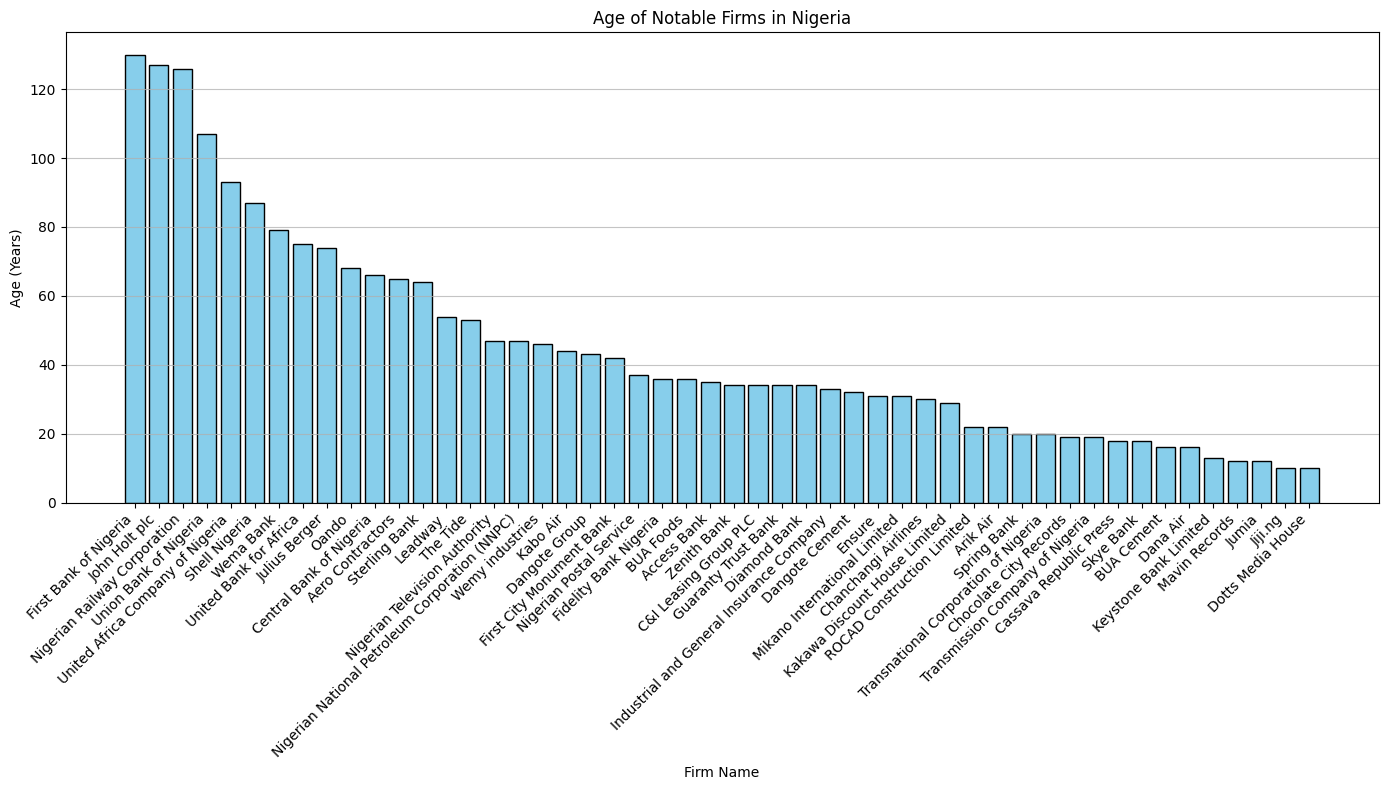

In [13]:
# PLOTTING A BAR CHART
plt.figure(figsize=(14, 8)) # the number of firms require this size for readability
plt.bar(df['Name'], df['Age'], color='skyblue', edgecolor='black')

plt.title('Age of Notable Firms in Nigeria')
plt.xlabel('Firm Name')
plt.ylabel('Age (Years)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75) #75% opacity for a clearer visualization
plt.tight_layout()

plt.show()

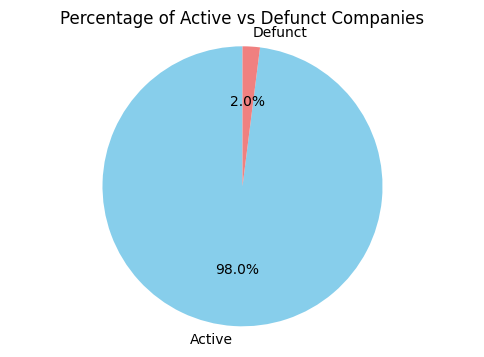

In [14]:
# The number of active and defunct companies
status_counts = df['Active/Defunct'].value_counts()
labels = ['Active', 'Defunct']
sizes = [status_counts.get('A', 0), status_counts.get('D', 0)]

plt.figure(figsize=(6, 4))  # Size of the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Active vs Defunct Companies')
plt.axis('equal') 

plt.show()


In [15]:
# THE NUMBER OF PRIVATE VS STATE OWNED FIRMS
status_counts = df['Private/State'].value_counts()
status_counts

Private/State
P    42
S     8
Name: count, dtype: int64

In [19]:
#To visualize the count of each sector by year
import seaborn as sns
# to group the df by Year and Sector to get counts
sector_year_counts = df.groupby(['Founded', 'Sector']).size().reset_index(name='Count')
sector_year_counts

,Founded,Sector,Count
0,1894,Banks,1
1,1897,Diversified industrials,1
2,1898,Railroads,1
3,1917,Banks,1
4,1931,–,1
5,1937,Exploration & production,1
6,1945,Banks,1
7,1949,Banks,1
8,1950,Heavy construction,1
9,1956,Exploration & production,1


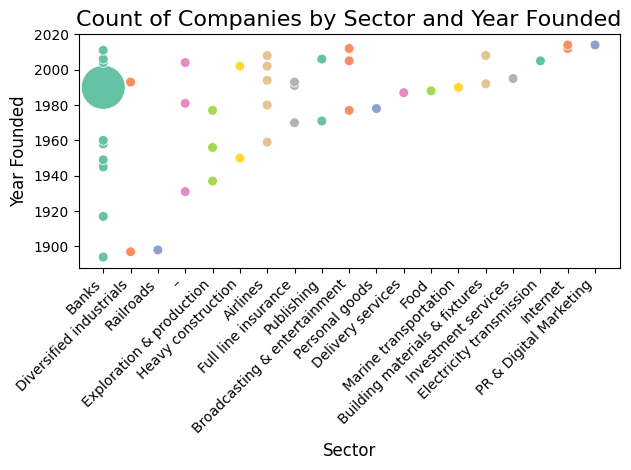

In [20]:
sns.scatterplot(data=sector_year_counts, x='Sector', y='Founded', size='Count', 
                sizes=(50, 1000), hue='Sector', palette='Set2', legend=False, marker='o')

# Improve plot appearance
plt.title('Count of Companies by Sector and Year Founded', fontsize=16)
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Year Founded', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()